In [1]:
import os
import sys
import warnings
import platform

# Basic Data Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats

# Exploratory Data Analysis (EDA)http://localhost:8888/notebooks/Desktop/BoazStockPred/Code/funda_easybio_2.ipynb#
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100


In [3]:
company = '이지바이오'

In [4]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\축산업')
data = pd.read_csv('data_1_{}.csv'.format(company),thousands=',',index_col=0)
data.head()

,Date,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,close_livecattle_f,open_livecattle_f,high_livecattle_f,low_livecattle_f,volume_livecattle_f,change%_livecattle_f,BDI,close_kospi_volatility,open_kospi_volatility,high_kospi_volatility,low_kospi_volatility,change%_kospi_volatility,Price_South Korea 5-Year Bond Yield,Open_South Korea 5-Year Bond Yield,High_South Korea 5-Year Bond Yield,Low_South Korea 5-Year Bond Yield,Change %_South Korea 5-Year Bond Yield,close_USD_KRW,open_USD_KRW,high_USD_KRW,low_USD_KRW,change%_USD_KRW,close_leanhog_f,open_leanhog_f,high_leanhog_f,low_leanhog_f,volume_leanhog_f,change%_leanhog_f,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150
0,2010-01-11,NaN,NaN,NaN,2450.0,2054718.0,1186071.0,NaN,NaN,NaN,NaN,NaN,85.05,85.875,85.875,85.000,27.57,-0.90,NaN,NaN,NaN,NaN,NaN,NaN,4.840,4.840,4.840,4.840,-1.43,1120.50,1124.70,1125.4,1115.40,-0.69,66.67,67.25,67.42,66.30,20.15,-0.86,56.129979,63.825350,79.082774,29.414997,47.784147,57.978590,-59.550562,90.0,3.813559,2388.067447,-1.019340e+06,89425050.0,0.150086,0.328768,-0.128450,0.128227,-0.090817,0.043300,0.461712,0.116433,-0.126272,-0.166290,0.427794,0.218076,0.507619,0.197948,0.160885,0.197399,7.099391,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-12,NaN,NaN,NaN,2640.0,2443731.0,2551680.0,NaN,NaN,NaN,NaN,NaN,85.45,85.050,85.575,84.750,29.62,0.47,NaN,NaN,NaN,NaN,NaN,NaN,4.860,4.860,4.860,4.860,0.41,1120.75,1119.70,1127.3,1117.30,0.02,66.40,66.45,66.78,65.55,17.88,-0.40,65.274242,75.954126,126.644737,30.246243,54.697380,54.397408,-16.853933,320.0,13.793103,2412.061023,-4.440656e+05,91976730.0,-0.221945,-0.042069,-0.470047,-0.246014,-0.450654,-0.328968,0.102575,-0.233234,-0.474628,-0.504328,0.185291,-0.152614,0.182645,-0.161057,-0.173912,-0.132418,-3.558052,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-13,NaN,NaN,NaN,2575.0,1879920.0,2561843.0,NaN,NaN,NaN,NaN,NaN,85.70,85.475,86.050,85.100,30.95,0.29,NaN,NaN,NaN,NaN,NaN,NaN,4.820,4.820,4.820,4.820,-0.82,1123.00,1120.75,1130.6,1118.80,0.20,68.97,66.50,69.15,66.50,25.22,3.87,60.619081,79.405968,126.525231,31.535018,50.000000,50.827176,-36.458333,175.0,7.291667,2427.579021,-9.382033e+05,89414887.0,0.158292,0.327087,-0.100540,0.137648,-0.085078,0.032111,0.435686,0.121049,-0.113419,-0.139299,0.419918,0.205617,0.490270,0.187930,0.143885,0.192334,-1.737452,-0.063823,NaN,NaN,NaN,NaN,NaN
3,2010-01-14,NaN,NaN,NaN,2545.0,1670983.0,1032237.0,NaN,NaN,NaN,NaN,NaN,86.65,85.975,86.800,85.800,34.21,1.11,NaN,NaN,NaN,NaN,NaN,NaN,4.775,4.775,4.775,4.775,-0.93,1123.00,1122.50,1123.9,1118.40,0.00,69.05,69.08,69.55,68.50,27.78,0.12,58.543849,78.812329,73.801031,32.111345,52.843915,52.513765,-42.708333,205.0,8.760684,2438.761971,-1.301389e+06,88382650.0,0.247625,0.395937,-0.016602,0.224420,-0.001652,0.109048,0.515397,0.192463,-0.028154,-0.075190,0.464002,0.281835,0.535903,0.267743,0.199049,0.295549,2.307692,0.601296,NaN,NaN,NaN,NaN,NaN
4,2010-01-15,NaN,NaN,NaN,2660.0,2226197.0,3799154.0,NaN,NaN,NaN,NaN,NaN,87.35,86.950,87.425,86.825,22.26,0.81,NaN,NaN,NaN,NaN,NaN,NaN,4.775,4.775,4.775,4.775,0.00,1123.50,1123.00,1125.3,1120.86,0.04,69.97,69.53,70.20,68.92,18.93,1.33,63.677169,86.622870,128.325954,33.558510,45.935546,49.593154,-29.090909,365.0,15.904139,2459.832260,-1.881121e+06,92181804.0,0.082205,0.281651,-0.224021,0.075790,-0.172296,-0.048502,0.403814,0.068302,-0.236157,-0.270052,0.405716,0.163633,0.453250,0.136207,0.075283,0.197806,-0.190114,-0.995937,0.075754,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 0 to 2460
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    2461 non-null   object 
 1   asset(1000)                             1908 non-null   float64
 2   debt(1000)                              1908 non-null   float64
 3   sales(1000)                             2095 non-null   float64
 4   adjusted_price                          2461 non-null   float64
 5   volumne(mean_5d)(week)                  2461 non-null   float64
 6   volumne(week)                           2461 non-null   float64
 7   profit(1000)                            2095 non-null   float64
 8   term_profit(1000)                       2095 non-null   float64
 9   gross_margin(1000)                      2095 non-null   float64
 10  adjusted_BPS                            1908 non-null   floa

In [6]:
data.set_index('Date', inplace=True)

In [7]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                               22.470540
debt(1000)                                22.470540
sales(1000)                               14.872003
adjusted_price                             0.000000
volumne(mean_5d)(week)                     0.000000
volumne(week)                              0.000000
profit(1000)                              14.872003
term_profit(1000)                         14.872003
gross_margin(1000)                        14.872003
adjusted_BPS                              22.470540
adjusted_EPS                              14.872003
close_livecattle_f                         2.234864
open_livecattle_f                          2.234864
high_livecattle_f                          2.234864
low_livecattle_f                           2.234864
volume_livecattle_f                        3.291345
change%_livecattle_f                       2.234864
BDI                                       13.206014
close_kospi_volatility                    36.204795
open_kospi_v

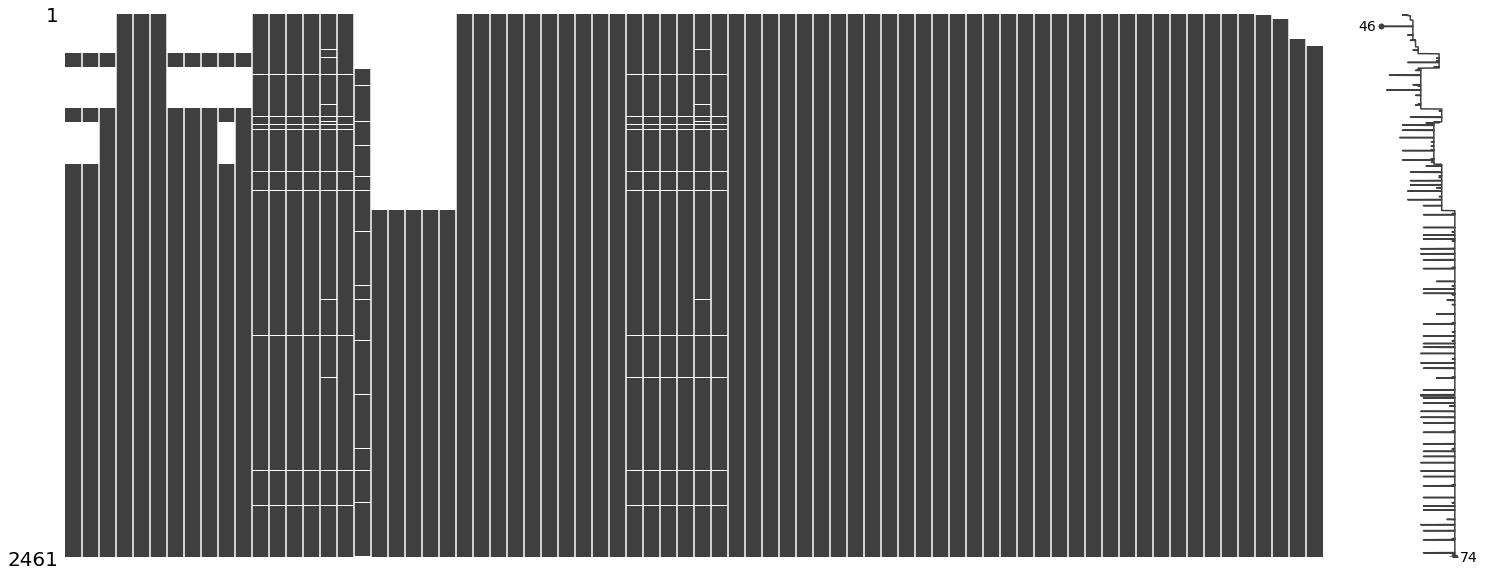

In [8]:
msno.matrix(data)
plt.show()

In [9]:
data.close_kospi_volatility[~data.close_kospi_volatility.isnull()]

Date
2013-08-06    14.98
2013-08-07    15.35
2013-08-08    14.96
2013-08-09    14.38
2013-08-12    14.72
              ...  
2019-12-23    13.97
2019-12-24    13.81
2019-12-26    14.15
2019-12-27    14.13
2019-12-30    14.69
Name: close_kospi_volatility, Length: 1570, dtype: float64

In [10]:
data = data['2013-08-06':]

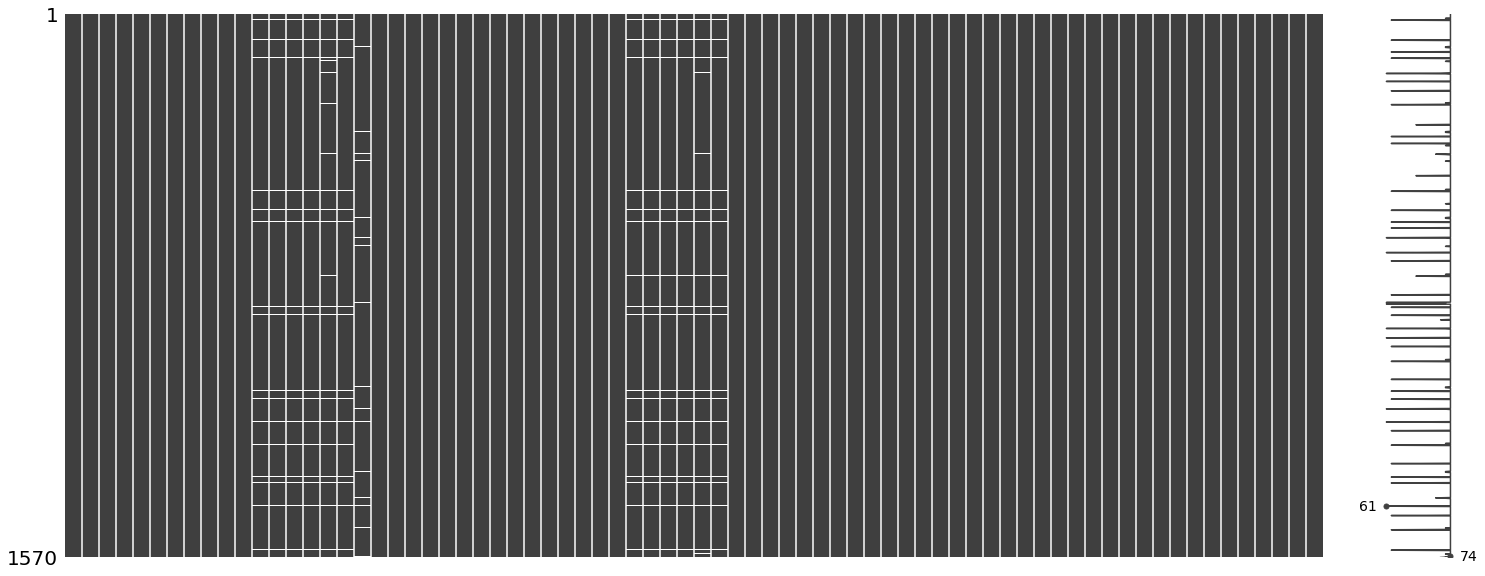

In [11]:
msno.matrix(data)
plt.show()

In [12]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                               0.000000
debt(1000)                                0.000000
sales(1000)                               0.000000
adjusted_price                            0.000000
volumne(mean_5d)(week)                    0.000000
volumne(week)                             0.000000
profit(1000)                              0.000000
term_profit(1000)                         0.000000
gross_margin(1000)                        0.000000
adjusted_BPS                              0.000000
adjusted_EPS                              0.000000
close_livecattle_f                        2.547771
open_livecattle_f                         2.547771
high_livecattle_f                         2.547771
low_livecattle_f                          2.547771
volume_livecattle_f                       3.248408
change%_livecattle_f                      2.547771
BDI                                       3.121019
close_kospi_volatility                    0.000000
open_kospi_volatility          

In [13]:
data.loc[:,'close_livecattle_f':'BDI'] = data.loc[:,'close_livecattle_f':'BDI'].fillna(method='ffill')
data.loc[:,'close_leanhog_f':'change%_leanhog_f'] = data.loc[:,'close_leanhog_f':'change%_leanhog_f'].fillna(method='ffill')

In [14]:
data.isnull().sum() / len(data) * 100

asset(1000)                               0.000000
debt(1000)                                0.000000
sales(1000)                               0.000000
adjusted_price                            0.000000
volumne(mean_5d)(week)                    0.000000
volumne(week)                             0.000000
profit(1000)                              0.000000
term_profit(1000)                         0.000000
gross_margin(1000)                        0.000000
adjusted_BPS                              0.000000
adjusted_EPS                              0.000000
close_livecattle_f                        0.000000
open_livecattle_f                         0.000000
high_livecattle_f                         0.000000
low_livecattle_f                          0.000000
volume_livecattle_f                       0.000000
change%_livecattle_f                      0.000000
BDI                                       0.000000
close_kospi_volatility                    0.000000
open_kospi_volatility          

# 종속변수

In [15]:
data[['profit_rate','adjusted_price']]

,profit_rate,adjusted_price
Date,,
2013-08-06,-0.927835,4865.0
2013-08-07,1.554404,4805.0
2013-08-08,-3.018109,4900.0
2013-08-09,-6.763788,4820.0
2013-08-12,-5.986696,4480.0
...,...,...
2019-12-23,0.000000,4845.0
2019-12-24,1.865285,4825.0
2019-12-26,1.128205,4915.0


In [16]:
# 예측하고자 하는 독립변수에 대한 기술통계
data.profit_rate.describe()

count    1569.000000
mean       -0.205903
std         2.534622
min        -9.926471
25%        -1.733102
50%        -0.287356
75%         1.172529
max        10.833333
Name: profit_rate, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


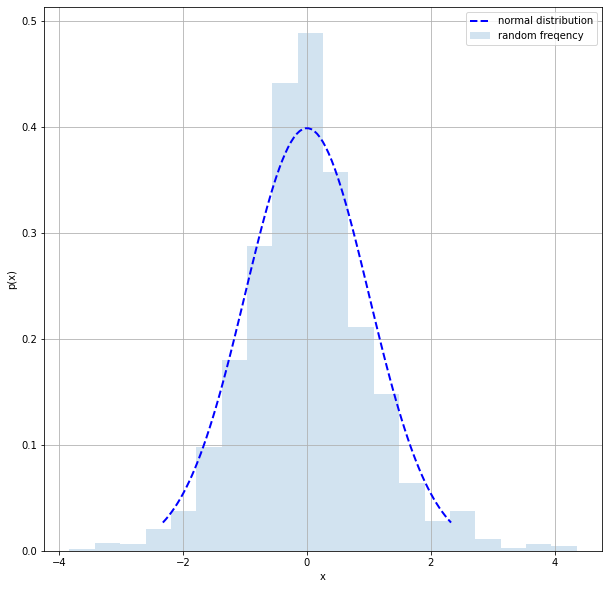

In [17]:
# 다음의 x 범위에서 표준 정규분포를 그릴 예정입니다.
x = np.linspace(stats.norm.ppf(.01), stats.norm.ppf(.99), 100) # x 범위 설정

fig = plt.figure(figsize=(10, 10))     # 플롯은 20 * 20 사이즈로 작성합니다.

# for 루프로 4개의 플롯을 작성하겠습니다.
# 정규분포 형태를 점선으로 표현
plt.plot(x, stats.norm.pdf(x), 'b--', lw=2, label='normal distribution')

# 발생한 난수의 히스토그램 작성
plt.hist((data.profit_rate-data.profit_rate.describe()['mean'])/data.profit_rate.describe()['std'], density=True, histtype='stepfilled', bins=20, alpha=.2, label='random freqency')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()

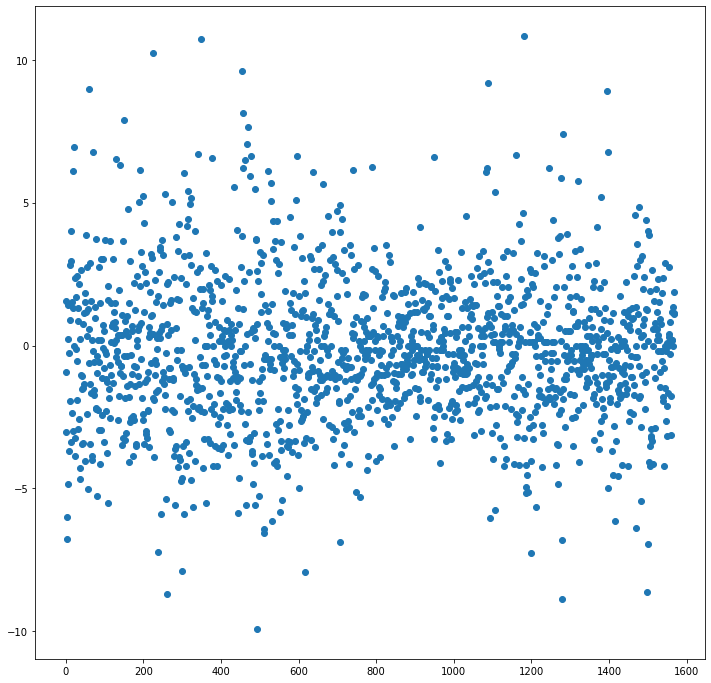

In [18]:
plt.figure(figsize=(12, 12))
x = data.profit_rate.values
plt.scatter(range(len(x)), x)
plt.show()

In [19]:
# 실수형인 종속변수를 범주형으로 바꾸기 위한 작업
def convert_target(x):
    THES = 0.2
    
    if x >= 8 * THES:
        return 2
    elif x >= THES and x < 8 * THES:
        return 1
    elif x >= (-THES) and x < THES:
        return 0
    elif x >= (-8*THES) and x < -THES:
        return -1
    else:
        return -2

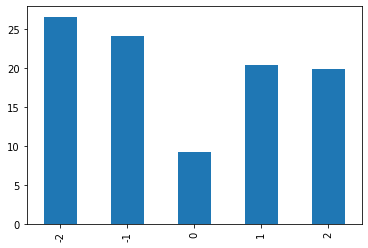

In [20]:
data['target'] = data['profit_rate'].map(convert_target)
target_ratio = data['target'].value_counts() / len(data['target']) * 100
target_ratio.sort_index().plot(kind='bar')
plt.show()

In [21]:
# data['rate_rolling_3'] = data['rate_rolling_3'].map(convert_target)
# data['rate_rolling_5'] = data['rate_rolling_5'].map(convert_target)

In [22]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\축산업\tech_data')

tech_data = pd.read_excel('{}_tech.xlsx'.format(company))
tech_data = tech_data[5:]
tech_data.columns = ['Date','open','high','low','last','volumne']
tech_data.Date = pd.to_datetime(tech_data.Date)
tech_data.set_index(tech_data.Date, inplace=True)
tech_data.head()

,Date,open,high,low,last,volumne
Date,,,,,,
2009-01-02,2009-01-02,1745,1855,1700,1750,6502103
2009-01-05,2009-01-05,1780,1865,1710,1865,5151387
2009-01-06,2009-01-06,1910,2045,1845,1900,9986364
2009-01-07,2009-01-07,1910,2185,1870,2185,6531056
2009-01-08,2009-01-08,2150,2175,2005,2020,7831444


In [23]:
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,close_livecattle_f,open_livecattle_f,high_livecattle_f,low_livecattle_f,volume_livecattle_f,change%_livecattle_f,BDI,close_kospi_volatility,open_kospi_volatility,high_kospi_volatility,low_kospi_volatility,change%_kospi_volatility,Price_South Korea 5-Year Bond Yield,Open_South Korea 5-Year Bond Yield,High_South Korea 5-Year Bond Yield,Low_South Korea 5-Year Bond Yield,Change %_South Korea 5-Year Bond Yield,close_USD_KRW,open_USD_KRW,high_USD_KRW,low_USD_KRW,change%_USD_KRW,close_leanhog_f,open_leanhog_f,high_leanhog_f,low_leanhog_f,volume_leanhog_f,change%_leanhog_f,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-08-06,1.442046e+09,1.082790e+09,391522106.0,4865.0,1078696.0,1023306.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,120.925,120.575,121.250,120.55,4.01,0.31,1046.0,14.98,14.79,14.98,14.61,0.40,3.195,3.205,3.21,3.19,0.16,1114.16,1113.85,1116.15,1111.85,0.00,100.55,100.25,101.00,100.15,9.55,0.33,48.005856,-42.957197,11.945392,12.801549,71.934990,59.679442,-64.705882,-245.0,-4.794521,4897.773206,-6.105702e+05,324806845.0,-0.119407,0.063229,-0.441082,-0.080114,-0.374699,-0.243060,0.342755,-0.102118,-0.444650,-0.491218,0.247148,-0.013424,0.293947,-0.034283,-0.102710,0.029282,-0.927835,0.344521,0.168571,-0.768458,-0.184017,-0.069752,-0.079609,-1
2013-08-07,1.442046e+09,1.082790e+09,391522106.0,4805.0,1080496.0,848058.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,121.225,121.050,122.650,120.80,6.94,0.25,1024.0,15.35,15.02,15.42,14.80,2.47,3.240,3.195,3.25,3.19,1.41,1115.37,1114.26,1120.25,1113.35,0.11,100.22,100.95,101.33,100.10,10.04,-0.33,46.210677,-45.703932,-62.775551,12.405324,50.361564,62.530783,-78.823529,-185.0,-3.707415,4888.937663,-6.941157e+05,323958787.0,0.051865,0.212273,-0.214164,0.007376,-0.192900,-0.069478,0.248952,-0.005945,-0.216313,-0.262040,0.283075,0.096273,0.360174,0.087284,0.001879,0.116263,1.554404,-0.831909,-0.227301,-0.742430,-0.459389,-0.072276,-0.081521,1
2013-08-08,1.442046e+09,1.082790e+09,391522106.0,4900.0,1117304.0,845720.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,122.675,122.600,123.675,122.45,4.97,1.20,1012.0,14.96,14.84,15.42,14.77,-2.54,3.225,3.240,3.25,3.13,-0.46,1112.70,1115.37,1115.95,1112.15,-0.24,100.62,100.53,101.03,100.25,4.42,0.40,49.434874,-39.756742,-20.601852,12.037401,34.844322,52.380292,-56.470588,50.0,1.030928,4889.991219,-3.960992e+05,324804507.0,0.067248,0.254356,-0.239234,0.045903,-0.210372,-0.066739,0.398422,0.041373,-0.244748,-0.289945,0.416212,0.113226,0.432164,0.115134,0.078102,0.177162,-3.018109,-0.820360,0.332027,-0.229136,-0.510456,-0.054114,-0.056177,-2
2013-08-09,1.442046e+09,1.082790e+09,391522106.0,4820.0,1000579.0,1317568.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,122.500,122.600,122.900,122.10,3.17,-0.14,1001.0,14.38,14.95,15.05,14.38,-3.88,3.235,3.240,3.25,3.21,0.31,1111.50,1112.75,1113.80,1107.30,-0.11,100.53,100.30,100.72,100.15,3.34,-0.09,46.886159,-41.025961,-9.761905,11.519441,27.564103,37.589996,-75.294118,-65.0,-1.330604,4883.325388,-5.642392e+05,323486939.0,0.060463,0.205966,-0.212607,0.051844,-0.178601,-0.076714,0.328643,0.018535,-0.217539,-0.236303,0.259339,0.099000,0.388790,0.106817,0.014589,0.146115,-6.763788,-0.797180,-0.791886,-0.520722,-0.561457,-0.067472,-0.097097,-2
2013-08-12,1.442046e+09,1.082790e+09,391522106.0,4480.0,1289270.0,2411698.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,123.600,122.975,123.675,122.75,2.69,0.90,996.0,14.72,14.84,15.22,14.64,2.36,3.210,3.220,3.25,3.03,-0.62,1114.22,1111.45,1114.87,1110.75,0

In [24]:
all_fe_rl = pd.merge(data,tech_data,how='left', left_index=True, right_index=True)

In [25]:
all_fe_rl.drop(columns= 'Date', inplace=True)

In [26]:
all_fe_rl.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,close_livecattle_f,open_livecattle_f,high_livecattle_f,low_livecattle_f,volume_livecattle_f,change%_livecattle_f,BDI,close_kospi_volatility,open_kospi_volatility,high_kospi_volatility,low_kospi_volatility,change%_kospi_volatility,Price_South Korea 5-Year Bond Yield,Open_South Korea 5-Year Bond Yield,High_South Korea 5-Year Bond Yield,Low_South Korea 5-Year Bond Yield,Change %_South Korea 5-Year Bond Yield,close_USD_KRW,open_USD_KRW,high_USD_KRW,low_USD_KRW,change%_USD_KRW,close_leanhog_f,open_leanhog_f,high_leanhog_f,low_leanhog_f,volume_leanhog_f,change%_leanhog_f,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target,open,high,low,last,volumne
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-08-06,1.442046e+09,1.082790e+09,391522106.0,4865.0,1078696.0,1023306.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,120.925,120.575,121.250,120.55,4.01,0.31,1046.0,14.98,14.79,14.98,14.61,0.40,3.195,3.205,3.21,3.19,0.16,1114.16,1113.85,1116.15,1111.85,0.00,100.55,100.25,101.00,100.15,9.55,0.33,48.005856,-42.957197,11.945392,12.801549,71.934990,59.679442,-64.705882,-245.0,-4.794521,4897.773206,-6.105702e+05,324806845.0,-0.119407,0.063229,-0.441082,-0.080114,-0.374699,-0.243060,0.342755,-0.102118,-0.444650,-0.491218,0.247148,-0.013424,0.293947,-0.034283,-0.102710,0.029282,-0.927835,0.344521,0.168571,-0.768458,-0.184017,-0.069752,-0.079609,-1,5020,5030,4855,4865,1023306
2013-08-07,1.442046e+09,1.082790e+09,391522106.0,4805.0,1080496.0,848058.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,121.225,121.050,122.650,120.80,6.94,0.25,1024.0,15.35,15.02,15.42,14.80,2.47,3.240,3.195,3.25,3.19,1.41,1115.37,1114.26,1120.25,1113.35,0.11,100.22,100.95,101.33,100.10,10.04,-0.33,46.210677,-45.703932,-62.775551,12.405324,50.361564,62.530783,-78.823529,-185.0,-3.707415,4888.937663,-6.941157e+05,323958787.0,0.051865,0.212273,-0.214164,0.007376,-0.192900,-0.069478,0.248952,-0.005945,-0.216313,-0.262040,0.283075,0.096273,0.360174,0.087284,0.001879,0.116263,1.554404,-0.831909,-0.227301,-0.742430,-0.459389,-0.072276,-0.081521,1,4850,4900,4770,4805,848058
2013-08-08,1.442046e+09,1.082790e+09,391522106.0,4900.0,1117304.0,845720.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,122.675,122.600,123.675,122.45,4.97,1.20,1012.0,14.96,14.84,15.42,14.77,-2.54,3.225,3.240,3.25,3.13,-0.46,1112.70,1115.37,1115.95,1112.15,-0.24,100.62,100.53,101.03,100.25,4.42,0.40,49.434874,-39.756742,-20.601852,12.037401,34.844322,52.380292,-56.470588,50.0,1.030928,4889.991219,-3.960992e+05,324804507.0,0.067248,0.254356,-0.239234,0.045903,-0.210372,-0.066739,0.398422,0.041373,-0.244748,-0.289945,0.416212,0.113226,0.432164,0.115134,0.078102,0.177162,-3.018109,-0.820360,0.332027,-0.229136,-0.510456,-0.054114,-0.056177,-2,4825,4900,4795,4900,845720
2013-08-09,1.442046e+09,1.082790e+09,391522106.0,4820.0,1000579.0,1317568.0,7060051.0,10305720.0,45855829.0,4713.32,129.41,122.500,122.600,122.900,122.10,3.17,-0.14,1001.0,14.38,14.95,15.05,14.38,-3.88,3.235,3.240,3.25,3.21,0.31,1111.50,1112.75,1113.80,1107.30,-0.11,100.53,100.30,100.72,100.15,3.34,-0.09,46.886159,-41.025961,-9.761905,11.519441,27.564103,37.589996,-75.294118,-65.0,-1.330604,4883.325388,-5.642392e+05,323486939.0,0.060463,0.205966,-0.212607,0.051844,-0.178601,-0.076714,0.328643,0.018535,-0.217539,-0.236303,0.259339,0.099000,0.388790,0.106817,0.014589,0.146115,-6.763788,-0.797180,-0.791886,-0.520722,-0.561457,-0.067472,-0.097097,-2,4970,5020,4795,4820,1317568
2013-08-12,1.442046e+09,1.082790e+09,391522106.0,4480.0,1289270.0,2411698.0,7060051.0,10305720.0,45855829.0,4713.32,12

In [27]:
data.columns

Index(['asset(1000)', 'debt(1000)', 'sales(1000)', 'adjusted_price',
       'volumne(mean_5d)(week)', 'volumne(week)', 'profit(1000)',
       'term_profit(1000)', 'gross_margin(1000)', 'adjusted_BPS',
       'adjusted_EPS', 'close_livecattle_f', 'open_livecattle_f',
       'high_livecattle_f', 'low_livecattle_f', 'volume_livecattle_f',
       'change%_livecattle_f', 'BDI', 'close_kospi_volatility',
       'open_kospi_volatility', 'high_kospi_volatility',
       'low_kospi_volatility', 'change%_kospi_volatility',
       'Price_South Korea 5-Year Bond Yield',
       'Open_South Korea 5-Year Bond Yield',
       'High_South Korea 5-Year Bond Yield',
       'Low_South Korea 5-Year Bond Yield',
       'Change %_South Korea 5-Year Bond Yield', 'close_USD_KRW',
       'open_USD_KRW', 'high_USD_KRW', 'low_USD_KRW', 'change%_USD_KRW',
       'close_leanhog_f', 'open_leanhog_f', 'high_leanhog_f', 'low_leanhog_f',
       'volume_leanhog_f', 'change%_leanhog_f', 'rsi_14', 'macd', 'cci', 'adx',
    

# 데이터 엔지니어링 더할것

In [28]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\축산업')
data.to_csv("data_2_{}.csv".format(company))